In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [46]:
#2
df = pd.read_csv('drug200.csv')

In [47]:
#3 kiem tra du lieu dung ham info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [48]:
#4 mo ta du lieu dung ham describe
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [49]:
#5.  Kiểm tra kiểu dữ liệu, dùng types
#6.  Kiểm tra tên cột, dùng columns
#7.  Kiểm tra dữ liệu trống, dùng df.isnull().sum()
#8.  Kiểm tra dữ liệu trùng, dùng df.duplicated().sum()

In [50]:
#9 doi ten cot phu hop
df.rename(columns= {'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M':'Male', 'F': 'Female'},inplace=True)
df['Sodium_to_Potassium'] = df ['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df ['Sodium_to_Potassium'].astype(int)
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3612\522514108.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':'Male', 'F': 'Female'},inplace=True)


,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [51]:
#10 thong ke so luong nguoi thuoc 5 nhom tuoi cao nhat
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count' : top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3612\1378945451.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)


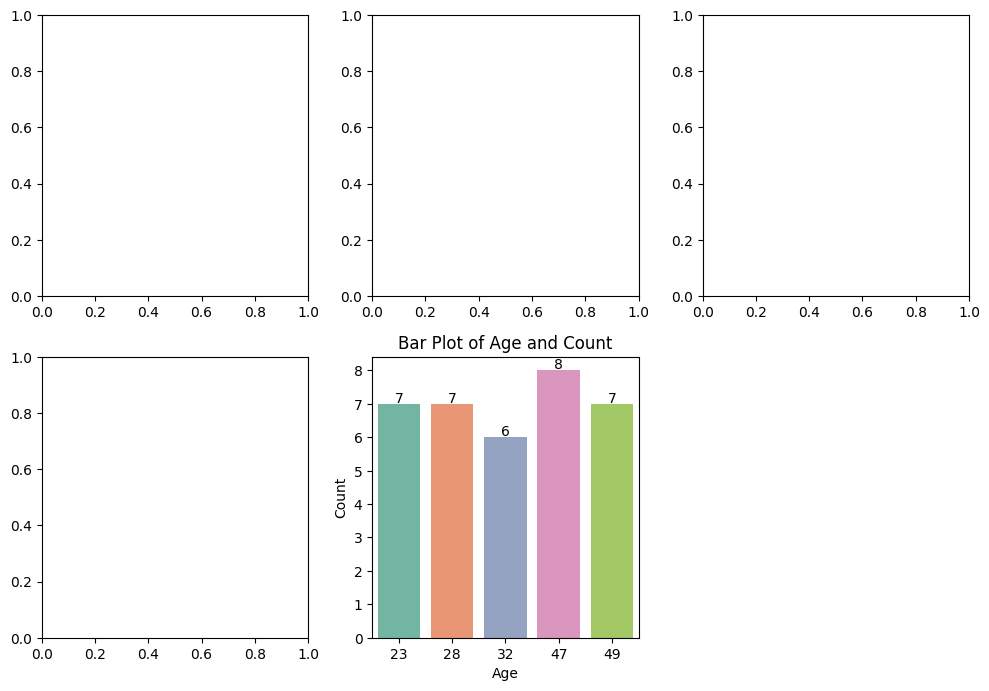

In [52]:
#11 tien hanh EDA du lieu

# EDA

def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):

    if plot_type == 'count':

        sns.countplot(x=x, data=data, palette=palette, ax=ax)

    elif plot_type == "bar":

        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:

        ax.annotate(f'{int(p.get_height())}',

                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points' )

# Create the figure and subplots

plt.figure(figsize=(10, 10))

# Define plot configurations

plot_configs = [

{'x': 'Sex', 'data': df, 'plot_type': 'count'},

{'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},

{'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},

{'x': 'Drug', 'data': df, 'plot_type': 'count'},

{'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}

]

# Loop through plot configurations to create subplots

for i, config in enumerate (plot_configs):

    ax = plt.subplot(3, 3, i+1)

create_plot(ax, **config)

plt.tight_layout()

plt.show()

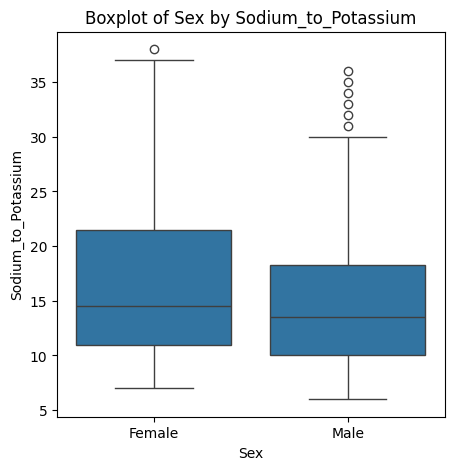

In [53]:
#tien hanh khao sat du lieu outlier va cho nhan xet
plt.figure(figsize=(5,5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title("Boxplot of Sex by Sodium_to_Potassium")
plt.show()

In [54]:
#13
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [55]:
#14

#OneHot Encoder

onehot_encoder_sex = OneHotEncoder (sparse_output=False)

one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex'])) 
X = pd.concat([X, one_hot_df], axis=1)

X = X.drop('Sex', axis=1) # Drop the original categorical columns

# Labelled encoder



labelled_encoder_blood_pressure = LabelEncoder()

labelled_encoder_cholesterol = LabelEncoder()

X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])

X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])


In [56]:
#15
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)
X

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [57]:
#16 17 18
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



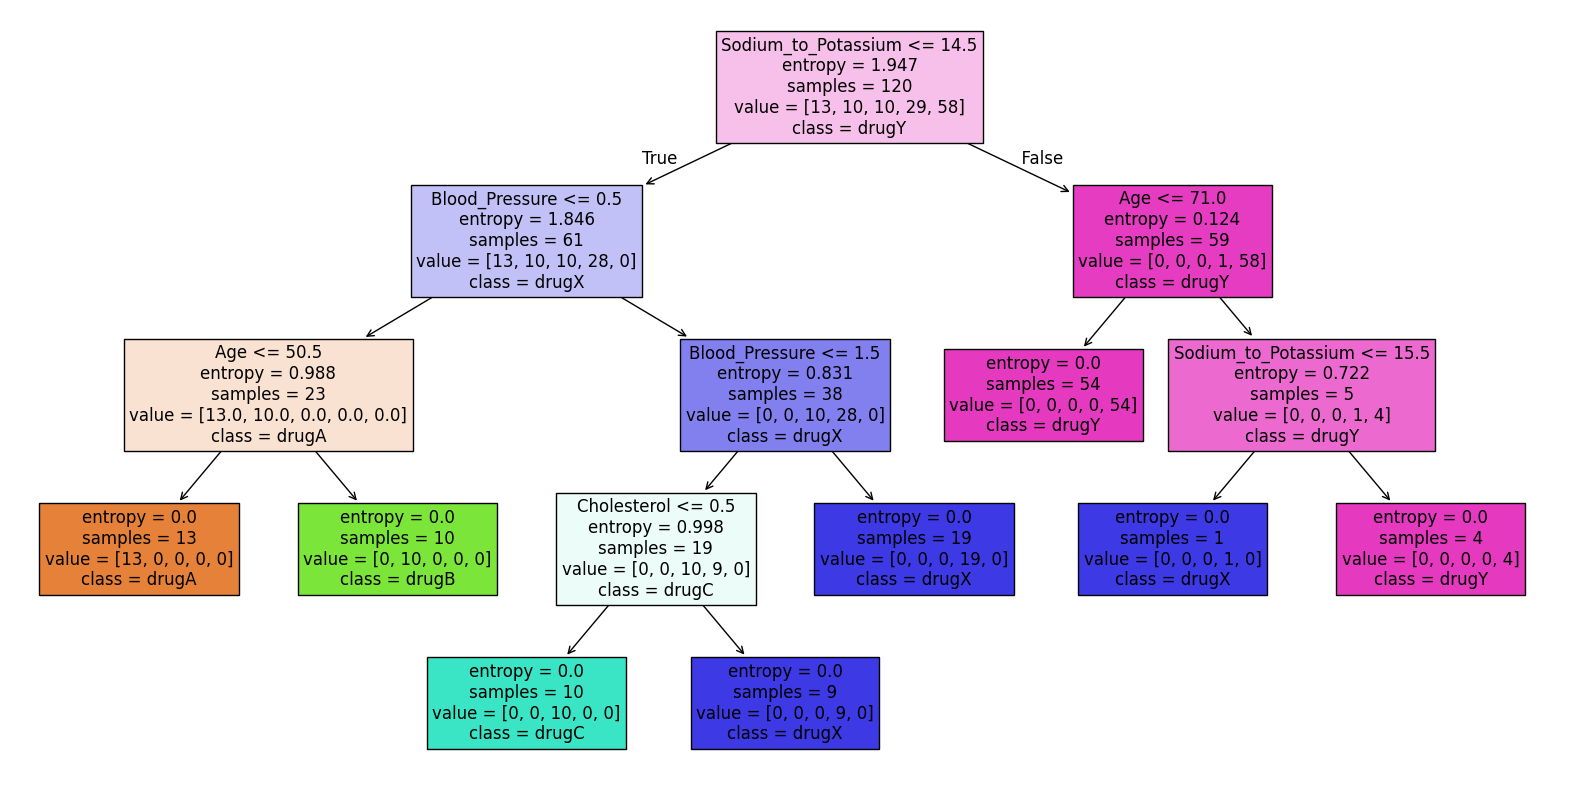

In [58]:
#19 Ve so do mo hinh phan cay phan lop. Sinh vien giai thich cac so lieu tren tung node va leaf]
from sklearn.tree import plot_tree

feature_cols = X_train.columns

plt.figure(figsize=(20,10))

plot_tree(dtc, class_names=dtc.classes_, feature_names=feature_cols, fontsize=12, filled=True) 
plt.show()


In [59]:
#21
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = dtc.predict(X_test)
# Tính độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Tính ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9875
Confusion Matrix:
[[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  1 32]]


In [60]:
#22
from sklearn.metrics import classification_report

target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [65]:
#23
def recommend_drug(age, blood_pressure, cholesterol, sodium_to_potassium, sex):
    # Duyệt qua từng hàng trong DataFrame
    for index, entry in df.iterrows():
        if (entry["Age"] == age and
            entry["Blood_Pressure"] == blood_pressure and
            entry["Cholesterol"] == cholesterol and
            entry["Sodium_to_Potassium"] == sodium_to_potassium and
            entry["Sex"] == sex):
            return entry["Drug"]
    return "Không tìm thấy thuốc phù hợp."

# Nhập thông tin từ người dùng
age = int(input("Nhập tuổi: "))
blood_pressure = input("Nhập huyết áp (HIGH/LOW/NORMAL): ").upper()
cholesterol = input("Nhập cholesterol (HIGH/NORMAL): ").upper()
sodium_to_potassium = int(input("Nhập tỷ lệ Sodium_to_Potassium: "))
sex = input("Nhập giới tính (Male/Female): ")

# Gọi hàm và in kết quả
result = recommend_drug(age, blood_pressure, cholesterol, sodium_to_potassium, sex)
print(f"Loại thuốc được cấp: {result}")

Loại thuốc được cấp: drugA
